In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_telco = pd.read_excel('Telco_customer_churn.xlsx')

# Data Cleansing

In [3]:
look_var = ['Monthly Charges', 'Total Charges','Tenure Months','Churn Label']

In [4]:
df_telco['Total Charges'] = np.where(df_telco['Total Charges']==' ', 0, df_telco['Total Charges'])
df_telco['Total Charges'] = df_telco['Total Charges'].astype(float)

In [5]:
df_telco[df_telco['Total Charges']==0][look_var]

,Monthly Charges,Total Charges,Tenure Months,Churn Label
2234,52.55,0.0,0,No
2438,20.25,0.0,0,No
2568,80.85,0.0,0,No
2667,25.75,0.0,0,No
2856,56.05,0.0,0,No
4331,19.85,0.0,0,No
4687,25.35,0.0,0,No
5104,20.00,0.0,0,No
5719,19.70,0.0,0,No
6772,73.35,0.0,0,No


# Data Transformation

## Tenure

<Axes: xlabel='Tenure Months', ylabel='Count'>

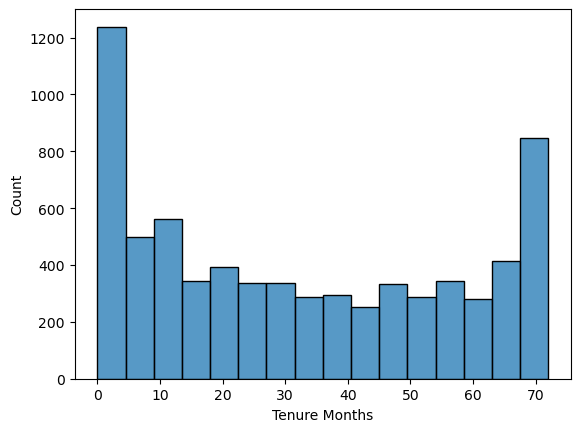

In [6]:
sns.histplot(
    data = df_telco, 
    x = 'Tenure Months'
)

In [7]:
def tenure_year(tenure_months):
    if tenure_months < 12:
        return 0
    elif tenure_months < 24:
        return 1
    elif tenure_months < 36:
        return 2
    elif tenure_months < 48:
        return 3
    elif tenure_months < 60:
        return 4
    else:
        return 5

def newly_onboard(tenure_months):
    if tenure_months <= 3:
        return 1
    else:
        return 0

In [8]:
df_telco['Tenure Years'] = df_telco['Tenure Months'].apply(tenure_year)
df_telco['newly onboard'] = df_telco['Tenure Months'].apply(newly_onboard)

In [9]:
df_telco['Tenure Years'].value_counts()

Tenure Years
0    2069
5    1483
1    1047
2     876
4     820
3     748
Name: count, dtype: int64

In [10]:
df_telco['newly onboard'].value_counts()

newly onboard
0    5981
1    1062
Name: count, dtype: int64

In [11]:
pd.crosstab(df_telco['Tenure Years'], df_telco['Churn Label'], normalize = 0)

Churn Label,No,Yes
Tenure Years,,
0,0.517158,0.482842
1,0.704871,0.295129
2,0.779680,0.220320
3,0.804813,0.195187
4,0.850000,0.150000
5,0.933243,0.066757


In [12]:
pd.crosstab(df_telco['newly onboard'], df_telco['Churn Label'], normalize = 0)

Churn Label,No,Yes
newly onboard,,
0,0.787327,0.212673
1,0.437853,0.562147


# Transaction

In [13]:
df_telco['Avg Charges'] = np.where(df_telco['Tenure Months']==0,0,df_telco['Total Charges']/df_telco['Tenure Months'])

In [14]:
monetary_var = ['Monthly Charges','Total Charges','Tenure Months','Avg Charges','Churn Label']
# df_telco[df_telco['Tenure Months']==0][monetary_var]
df_telco[monetary_var]

,Monthly Charges,Total Charges,Tenure Months,Avg Charges,Churn Label
0,53.85,108.15,2,54.075000,Yes
1,70.70,151.65,2,75.825000,Yes
2,99.65,820.50,8,102.562500,Yes
3,104.80,3046.05,28,108.787500,Yes
4,103.70,5036.30,49,102.781633,Yes
...,...,...,...,...,...
7038,21.15,1419.40,72,19.713889,No
7039,84.80,1990.50,24,82.937500,No
7040,103.20,7362.90,72,102.262500,No
7041,29.60,346.45,11,31.495455,No


In [15]:
df_telco['Charge drop'] = np.where(df_telco['Monthly Charges'] < df_telco['Avg Charges'],1,0)
df_telco['Charge diff'] = df_telco['Monthly Charges'] - df_telco['Avg Charges']

monetary_var = monetary_var + ['Charge drop','Charge diff']

In [16]:
df_telco['Charge drop'].value_counts()

Charge drop
0    3839
1    3204
Name: count, dtype: int64

In [17]:
pd.crosstab(df_telco['Charge drop'],df_telco['Churn Label'],normalize = 0 )

Churn Label,No,Yes
Charge drop,,
0,0.705392,0.294608
1,0.769663,0.230337


<Axes: xlabel='Charge diff', ylabel='Count'>

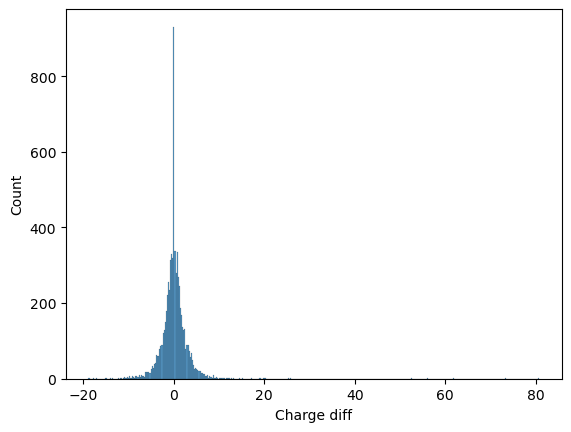

In [18]:
sns.histplot(df_telco['Charge diff'])

In [19]:
df_telco[df_telco['Charge diff']<-15][monetary_var]

,Monthly Charges,Total Charges,Tenure Months,Avg Charges,Churn Label,Charge drop,Charge diff
40,104.40,242.80,2,121.400000,Yes,1,-17.000000
174,75.10,270.70,3,90.233333,Yes,1,-15.133333
651,75.70,189.20,2,94.600000,Yes,1,-18.900000
1323,79.60,195.05,2,97.525000,Yes,1,-17.925000
2798,80.15,194.55,2,97.275000,No,1,-17.125000
4198,94.85,335.75,3,111.916667,No,1,-17.066667


# Save Data

In [20]:
df_telco.to_csv('Telco_customer_churn_clean.csv', index = False)